In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
from sklearn.model_selection import KFold

In [8]:
import numpy as py
import pandas as pd
from src2.utils import *
from src.utils import *
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import accuracy_score
from sklearn.utils import check_X_y

In [10]:
from sklearn.neighbors import KNeighborsClassifier

In [11]:
from pycaret.anomaly import *

ModuleNotFoundError: No module named 'pycaret'

In [39]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [40]:
def relabel_machine_status(x):
    if x == "BROKEN" or x == "RECOVERING":
        return "ABNORMAL"
    else:
        return x

In [94]:
def numerical_machine_status(x):
    if x=="NORMAL":
        return 0
    else:
        if x=="BROKEN":
            return -1
        else:
            return -2
# def numerical_machine_status(x):
#     if x=="NORMAL":
#         return 0
#     else:
#         return -1

In [95]:
def etat_err_gb(x):
    if x<1.7:
        return 1
    elif x<2.4:
        return 2
    else:
        return 3

In [96]:
df = pd.read_csv("sensor_1.csv")
df.drop("Unnamed: 0", axis=1, inplace=True)
df

,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
0,2018-04-01 00:00:00,2.465394,47.09201,53.211800,46.310760,634.375000,76.45975,13.41146,16.13136,15.56713,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
1,2018-04-01 00:01:00,2.465394,47.09201,53.211800,46.310760,634.375000,76.45975,13.41146,16.13136,15.56713,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2,2018-04-01 00:02:00,2.444734,47.35243,53.211800,46.397570,638.888900,73.54598,13.32465,16.03733,15.61777,...,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL
3,2018-04-01 00:03:00,2.460474,47.09201,53.168400,46.397568,628.125000,76.98898,13.31742,16.24711,15.69734,...,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL
4,2018-04-01 00:04:00,2.445718,47.13541,53.211800,46.397568,636.458300,76.58897,13.35359,16.21094,15.69734,...,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220315,2018-08-31 23:55:00,2.407350,47.69965,50.520830,43.142361,634.722229,64.59095,15.11863,16.65220,15.65393,...,38.28125,68.287030,52.37268,48.32176,41.087960,212.3843,153.64580,NaN,231.1921,NORMAL
220316,2018-08-31 23:56:00,2.400463,47.69965,50.564240,43.142361,630.902771,65.83363,15.15480,16.70284,15.65393,...,38.28125,66.840280,50.63657,48.03241,40.798610,213.8310,156.25000,NaN,231.1921,NORMAL
220317,2018-08-31 23:57:00,2.396528,47.69965,50.520830,43.142361,625.925903,67.29445,15.08970,16.70284,15.69734,...,39.06250,65.393520,48.90046,48.03241,40.798610,217.3032,155.38190,NaN,232.0602,NORMAL
220318,2018-08-31 23:58:00,2.406366,47.69965,50.520832,43.142361,635.648100,65.09175,15.11863,16.56539,15.74074,...,40.62500,64.236110,47.74306,48.32176,40.509258,222.5116,153.93520,NaN,234.0856,NORMAL


In [97]:
df["machine_status"] = pd.Categorical(df["machine_status"])
df["timestamp"] = pd.to_datetime(df["timestamp"])

In [98]:
df.shape

(220320, 54)

In [99]:
# df["relabelled_machine_status"] = df["machine_status"].apply(relabel_machine_status)
df["relabelled_machine_status_numerical"] = df["machine_status"].apply(numerical_machine_status)
df[df.relabelled_machine_status_numerical==2]

,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,...,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status,relabelled_machine_status_numerical


In [100]:
df_gb = df.groupby(pd.Grouper(key="timestamp", axis=0, freq="D")).mean()
df_gb.reset_index(inplace=True)
df_gb

,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,...,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51
0,2018-04-01,2.454139,47.318882,52.567363,45.273315,634.166035,74.516172,13.348212,16.161459,15.680862,...,32.626770,40.682243,50.859817,51.617557,45.070015,39.786884,197.029723,92.171022,241.056817,217.054678
1,2018-04-02,2.429367,48.595226,52.199163,44.094026,635.990899,77.960694,13.340421,16.161022,15.643311,...,33.555409,43.272566,46.112437,66.206316,53.731031,40.172284,203.099479,73.322964,243.407801,205.087368
2,2018-04-03,2.435093,49.266702,52.060062,44.336599,640.359938,76.903797,13.452223,16.301238,15.738662,...,34.660190,42.534900,44.204121,47.936961,42.168222,40.946113,157.432927,64.259821,201.386879,201.646492
3,2018-04-04,2.452493,50.429565,51.959000,45.096479,640.173640,75.858830,13.512238,16.511281,15.533056,...,34.545354,43.123188,42.631220,45.638222,43.511485,40.603311,154.669415,67.019917,213.312395,204.283411
4,2018-04-05,2.454101,49.353086,52.096564,43.982806,636.350491,76.824878,13.425036,16.227121,15.658517,...,33.312353,42.356406,45.254630,46.999582,44.231047,39.532897,213.241463,82.239020,240.274159,234.841377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,2018-08-27,2.397325,49.077267,50.995007,44.272972,629.476285,75.191813,14.732405,16.555016,15.722818,...,31.871201,44.036998,45.100107,45.915163,54.741151,41.868824,265.343482,75.546955,NaN,215.756213
149,2018-08-28,2.484509,48.750963,50.825465,44.272459,631.976319,72.276470,15.060769,16.604658,15.663053,...,31.891636,43.499707,46.501254,60.823367,61.883520,42.537334,282.142366,72.129388,NaN,217.672568
150,2018-08-29,2.462678,48.388881,51.325923,44.761404,629.564036,76.858206,15.095380,16.576662,15.673291,...,32.484627,43.391200,51.786748,65.166860,61.894571,42.187888,313.535835,87.895648,NaN,217.231304
151,2018-08-30,2.440611,49.141889,51.904927,45.522188,628.580324,73.744396,15.075095,16.537262,15.647450,...,33.278354,42.855538,57.698969,55.559976,56.916112,45.339225,280.001366,95.470236,NaN,221.649949


In [101]:
df_gb["statu_gb"] = df_gb["relabelled_machine_status_numerical"].apply(etat_err_gb)

KeyError: 'relabelled_machine_status_numerical'

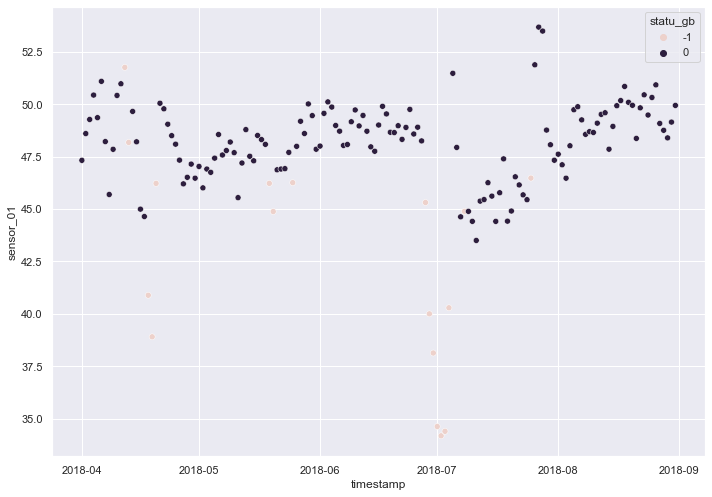

In [12]:
sns.scatterplot(x="timestamp", y="sensor_01", hue="statu_gb",data=df_gb)
plt.show()

In [22]:
kf = KFold(n_splits=10, shuffle=True).split(df_gb)

In [39]:
cls = KNeighborsClassifier(n_neighbors=10)
X = df_gb.iloc[:, 1:-2]
y = df_gb.iloc[:, -1]
for train_index, test_index in kf:
#     print(train_index)
#     print(test_index)
    X_train = X[train_index,:]
    y_train = y[train_index]
    X_val = X[test_index, :]
    y_val = y[test_index]
    cls.fit(X_train, y_train)
    pred = cls.predict(X_val)


NameError: name 'KNeighborsClassifier' is not defined

In [34]:
# df_gb.iloc[:,lambda df: [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52]]
# X = df_gb.iloc[:, 1:-2]
# X

In [38]:
# y = df_gb.iloc[:, -1]
# y

0      0
1      0
2      0
3      0
4      0
      ..
148    0
149    0
150    0
151    0
152    0
Name: statu_gb, Length: 153, dtype: int64